In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
data= pd.read_csv("train.csv")
data.head()

,Blast NO,B,S,ST,MC,PF,HD,BS,D,PPV
0,1,4.0,6.5,2.5,69.470,10.66,8.00,0.62,100.49,3.477
1,2,4.0,6.5,2.5,69.470,10.66,8.00,0.62,226.90,1.318
2,3,4.0,6.0,2.5,51.790,11.27,8.50,0.67,183.00,2.762
3,4,4.0,6.0,2.5,51.790,11.27,8.50,0.67,311.00,1.318
4,5,4.0,6.0,2.5,49.762,12.23,4.75,0.67,139.40,4.380


In [ ]:
data.describe()

,Blast NO,B,S,ST,MC,PF,HD,BS,D,PPV
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,68.000000,2.954519,3.623333,3.685185,915.002222,9.357704,12.696296,0.834000,576.758593,4.521104
std,39.115214,0.553385,1.090269,1.275107,931.259906,4.630089,5.084215,0.072813,410.371630,24.624347
min,1.000000,2.500000,3.000000,2.500000,21.016000,0.680000,3.000000,0.620000,23.000000,0.030000
25%,34.500000,2.660000,3.050000,3.000000,76.000000,9.220000,11.000000,0.830000,216.720000,0.405000
50%,68.000000,2.660000,3.050000,3.500000,567.500000,9.220000,12.500000,0.870000,460.000000,0.980000
75%,101.500000,3.670000,4.200000,3.500000,1693.500000,10.055000,12.500000,0.870000,1020.000000,2.490000
max,135.000000,4.000000,6.500000,7.000000,3000.000000,18.390000,25.000000,0.870000,1500.000000,250.000000


In [ ]:
X = data.drop(['PPV','Blast NO','B','S'],axis=1)
X

,ST,MC,PF,HD,BS,D
0,2.5,69.470,10.66,8.00,0.62,100.49
1,2.5,69.470,10.66,8.00,0.62,226.90
2,2.5,51.790,11.27,8.50,0.67,183.00
3,2.5,51.790,11.27,8.50,0.67,311.00
4,2.5,49.762,12.23,4.75,0.67,139.40
...,...,...,...,...,...,...
130,7.0,83.000,18.39,25.00,0.87,368.00
131,7.0,242.000,18.39,25.00,0.87,376.00
132,7.0,354.000,18.39,25.00,0.87,400.00
133,7.0,180.000,18.39,25.00,0.87,403.00


In [ ]:
Y= pd.DataFrame(data.iloc[:,-1])
Y

,PPV
0,3.477
1,1.318
2,2.762
3,1.318
4,4.380
...,...
130,0.950
131,1.150
132,0.850
133,0.350


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =train_test_split(X,Y,test_size=0.20)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor =RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train,Y_train)
Y_pred=regressor.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
Y_test

,PPV
74,3.12
66,0.35
78,0.98
73,3.85
4,4.38
71,0.38
24,0.20
127,0.20
36,3.05
122,0.95


In [ ]:
print(Y_pred)

array([1.7573    , 0.4655    , 0.4655    , 2.2805    , 2.7327    ,
       0.443     , 0.2555    , 0.5295    , 4.1015    , 2.19576667,
       2.09336667, 0.2555    , 3.335     , 2.77285   , 1.684     ,
       0.3765    , 5.2626    , 1.707     , 2.2805    , 4.1015    ,
       0.3335    , 1.2885    , 2.9144    , 0.3745    , 2.40533333,
       0.432     , 0.34      ])

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test,Y_pred))
print('MSE:', metrics.mean_squared_error(Y_test,Y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))
print('r2score:',metrics.r2_score(Y_test,Y_pred))

MAE: 0.9119611111111112
MSE: 1.668256645895062
RMSE: 1.2916100982475562
r2score: 0.6245292889794436


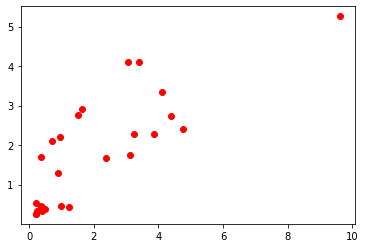

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(Y_test,Y_pred,color='red')

In [ ]:
testing = pd.read_csv('test.csv')

In [ ]:
pred = regressor.predict(testing)
pred

array([0.2725    , 0.2725    , 0.9644    , 0.273     , 1.9908    ,
       2.1076    , 1.1338    , 0.97623333, 1.1338    , 2.5805    ,
       2.2273    , 1.81      , 1.4009    , 0.95953333, 3.219     ,
       3.219     , 2.1423    , 1.5704    , 0.96193333, 3.55755   ,
       1.3121    , 2.7701    , 1.2498    , 2.7327    ])